<a href="https://colab.research.google.com/github/Siddhartha7340/small_miscellaneous_work/blob/main/feature_extraction_in_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:50<00:00, 24.4MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.7MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base= VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model= Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
conv_base.trainable=False

In [ ]:
#generators
#This code does nothing bout uses the above to take and label the data from the directory
#as specified

train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
#in this logic make all the pixel value from 255 to 1 so that the training becomes faster

def process(image,label):
  image=tensorflow.cast(image/255.,tensorflow.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 62s 88ms/step - loss: 0.2735 - accuracy: 0.8847 - val_loss: 0.2061 - val_accuracy: 0.9144
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1935 - accuracy: 0.9207 - val_loss: 0.2267 - val_accuracy: 0.9038
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1616 - accuracy: 0.9348 - val_loss: 0.2872 - val_accuracy: 0.8816
Epoch 4/10
625/625 [==============================] - 55s 88ms/step - loss: 0.1402 - accuracy: 0.9431 - val_loss: 0.2105 - val_accuracy: 0.9176
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1113 - accuracy: 0.9552 - val_loss: 0.2752 - val_accuracy: 0.9026
Epoch 6/10
625/625 [==============================] - 58s 93ms/step - loss: 0.0843 - accuracy: 0.9668 - val_loss: 0.3038 - val_accuracy: 0.8954
Epoch 7/10
625/625 [==============================] - 55s 88ms/step - loss: 0.0687 - accuracy: 0.9736 - val_loss: 0.2751 - val_accura

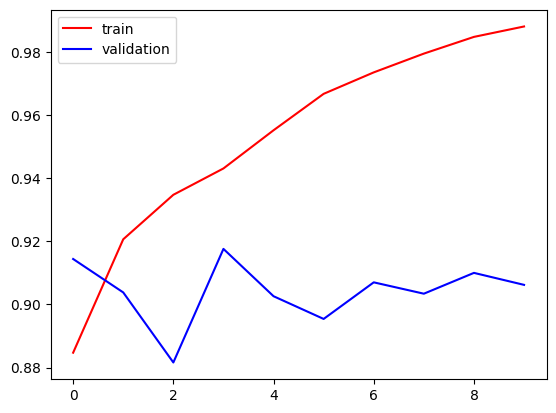

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

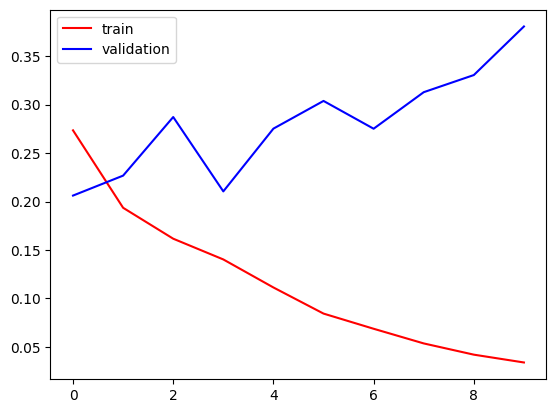

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()